<a href="https://colab.research.google.com/github/snehadevi/Duplicate-Finder/blob/main/Duplicate_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####INSTALLATION


In [ ]:
!pip install trax==1.3.1

     |████████████████████████████████| 348kB 5.7MB/s 
     |████████████████████████████████| 2.6MB 17.5MB/s 
     |████████████████████████████████| 1.5MB 41.4MB/s 
     |████████████████████████████████| 163kB 12.3MB/s 
     |████████████████████████████████| 307kB 53.0MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
     |████████████████████████████████| 983kB 51.1MB/s 
     |████████████████████████████████| 5.3MB 56.2MB/s 
     |████████████████████████████████| 194kB 56.0MB/s 
     |████████████████████████████████| 358kB 58.1MB/s 
     |████████████████████████████████| 655kB 44.9MB/s 
     |████████████████████████████████| 368kB 47.4MB/s 
     |████████████████████████████████| 3.5MB 29.9MB/s 
     |████████████████████████████████| 1.1MB 53.1MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 890kB 44.7MB/s 
     |████████████████████████████████| 235kB 53.2MB/s 
     |████████████████████████████████| 51kB 7.2MB/s

## IMPORT

In [ ]:
import os
import nltk
import trax
from trax import layers as tl
from trax.supervised import training
from trax.fastmath import numpy as fastnp
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, f1_score
from nltk.corpus import stopwords 
import re
from nltk.stem import PorterStemmer
%matplotlib inline

#from pathlib import Path


# set random seeds
trax.supervised.trainer_lib.init_random_number_generators(34)
rnd.seed(34)

INFO:tensorflow:tokens_length=568 inputs_length=512 targets_length=114 noise_density=0.15 mean_noise_span_length=3.0 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHoPLCsd3VLGttF4UjQPle3O6Ne4o6idlhikrlR5AXdhHlOae_AHbM
Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/colab_data/qstn_duplicate/

/content/drive/My Drive/colab_data/qstn_duplicate


In [ ]:
#path = Path(os.getcwd())
data = pd.read_csv("questions.csv")
print(len(data))
data.isnull().sum()

404351


id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
data = data.dropna()
print(len(data))
data.head(10)

404348


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
df_pos = data.loc[(data['is_duplicate'] == 1)]
print(len(df_pos))
df_pos.head()

149306


,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [ ]:
df_neg = data.loc[data['is_duplicate'] == 0 ]
print(len(df_neg))
df_neg.head()

255042


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
N = len(df_pos) - 5000
train_data = df_pos[:N]
t_data = df_pos[N:]
test_data = pd.concat([df_neg[:len(t_data)], t_data])
print(len(train_data))
print(len(test_data))
#t_data.head()
#df_neg.head()
test_data.head()

144306
10000


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
y_test  = np.array(test_data['is_duplicate'])
print(y_test)
print(len(y_test))

[0 0 0 ... 1 1 1]
10000


###DATA PROCESSING

In [ ]:
# duplicate_indexes = (train_data['is_duplicate']==1).to_numpy()
# print(duplicate_indexes)
# duplicate_indexes = [i for i,x in enumerate(duplicate_indexes) if x]
# print(duplicate_indexes)

In [ ]:
# print(len(duplicate_indexes))

In [ ]:
def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words '''
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()

    return text

In [ ]:
porter = PorterStemmer()

In [ ]:
print (text_to_word_list(train_data['question1'][5]))
print (train_data['question2'][5])

['astrology', ':', 'i', 'am', 'a', 'capricorn', 'sun', 'cap', 'moon', 'and', 'cap', 'rising', 'what', 'does', 'that', 'say', 'about', 'me']
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?


In [ ]:
Q1_train_words = np.array(train_data['question1'].str.lower())
Q2_train_words = np.array(train_data['question2'].str.lower())
print(Q1_train_words[66424])
print(Q2_train_words[66424])

which countries will support india if china attacks india?
today if china will attack on india. which country will support india in war against of china?


In [ ]:
# Q1_train_words = np.array(train_data['question1'][duplicate_indexes])
# Q2_train_words = np.array(train_data['question2'][duplicate_indexes])
# print(Q1_train_words[0])
# print(Q2_train_words[0])

In [ ]:
Q1_test_words = np.array(test_data['question1'].str.lower())
Q2_test_words = np.array(test_data['question2'].str.lower())
print(Q1_test_words[7])
print(Q2_test_words[7])

motorola (company): can i hack my charter motorolla dcx3400?
how do i hack motorola dcx3400 for free internet?


In [ ]:
Q1_train = np.empty_like(Q1_train_words)
Q2_train = np.empty_like(Q2_train_words)

Q1_test = np.empty_like(Q1_test_words)
Q2_test = np.empty_like(Q2_test_words)

In [ ]:

from collections import defaultdict

vocab = defaultdict(lambda: 0)
vocab['<PAD>'] = 1

for idx in range(len(Q1_train_words)):
    Q1_train[idx] = [porter.stem(w) for w in (text_to_word_list(Q1_train_words[idx]))]
    Q2_train[idx] = [porter.stem(w) for w in (text_to_word_list(Q2_train_words[idx]))]
    q = Q1_train[idx] + Q2_train[idx]
    for word in q:
        if word not in vocab:
            vocab[word] = len(vocab) + 1
print('The length of the vocabulary is: ', len(vocab))

#print(vocab)
print(len(vocab))


The length of the vocabulary is:  20374
20374


In [ ]:

print(vocab['<PAD>'])
print(vocab['astrology'])
print(vocab['Sneha'])

1
0
0


In [ ]:
for i in range(len(Q1_test_words)):
  Q1_test[i] = [porter.stem(w) for w in (text_to_word_list(Q1_test_words[i]))]
  #print('q1', i, Q1_test[i])
  Q2_test[i] = [porter.stem(w) for w in (text_to_word_list(Q2_test_words[i]))]
  #print('q2', i, Q2_test[i])

In [ ]:
print('Train set length: ', len(Q1_train) ) 
print('Test set length: ', len(Q1_test) ) 

Train set length:  144306
Test set length:  10000


In [ ]:
print(Q1_train[0])
print(Q1_test[0])

['astrolog', ':', 'i', 'am', 'a', 'capricorn', 'sun', 'cap', 'moon', 'and', 'cap', 'rise', 'what', 'doe', 'that', 'say', 'about', 'me']
['what', 'is', 'the', 'step', 'by', 'step', 'guid', 'to', 'invest', 'in', 'share', 'market', 'in', 'india']


###CONVERTING INTO TENSOR

In [ ]:
for i in range(len(Q1_train)):
  Q1_train[i] = [vocab[word] for word in Q1_train[i]]
  Q2_train[i] = [vocab[word] for word in Q2_train[i]]

for i in range(len(Q1_test)):
  Q1_test[i] = [vocab[word] for word in Q1_test[i]]
  Q2_test[i] = [vocab[word] for word in Q2_test[i]]


In [ ]:
print(Q1_train_words[0])
print(Q1_train[0])
print(Q1_test_words[0])
print(Q1_test[0])


astrology: i am a capricorn sun cap moon and cap rising...what does that say about me?
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 9, 12, 13, 14, 15, 16, 17, 18]
what is the step by step guide to invest in share market in india?
[13, 134, 66, 878, 88, 878, 4272, 30, 1080, 21, 880, 455, 21, 266]


In [ ]:
cut_point = int(len(Q1_train)*.9)
training_Q1 = Q1_train[:-10000]
training_Q2 = Q2_train[:-10000]

eval_Q1 = Q1_train[-10000:]
eval_Q2 = Q2_train[-10000:]

print(len(training_Q1))
print(len(eval_Q1))

134306
10000


In [ ]:
def batch_generator(question1, question2, batch_size, pad=1, shuffle=False):
  batch_q1 = []
  batch_q2 = []
  index = 0
  shufflable_indexes = [i for i in range(len(question1))]
  #print(shufflable_indexes)


  if shuffle==True:
    rnd.shuffle(shufflable_indexes)
  
  while True:
    if (index >= len(question1)):
      index = 0

      if shuffle==True:
        rnd.shuffle(shufflable_indexes)
          

    q1 = question1[shufflable_indexes[index]]
    q2 = question2[shufflable_indexes[index]]

    # print(q1)
    # print(q2)

    index += 1

    batch_q1.append(q1)
    batch_q2.append(q2)

    # print(batch_q1)
    # print(batch_q2)

    if len(batch_q1)==batch_size:
      b_q1 = []
      b_q2 = []

      max_len = max(max([len(_) for _ in batch_q1]), max([len(_) for _ in batch_q2]))
      max_len = 2**int(np.ceil(np.log2(max_len)))

      #print(max_len)

      for q1, q2 in zip(batch_q1, batch_q2):
        q1 = q1 + (max_len-len(q1)) * [pad]
        q2 = q2 + (max_len-len(q2)) * [pad]

        b_q1.append(q1)
        b_q2.append(q2)

        # print(b_q1)
        # print(b_q2)


      yield np.array(b_q1),  np.array(b_q2)
      batch_q1 = []
      batch_q2 = []
 


In [ ]:
Q1 = training_Q1[:10]
#print(Q1)
Q2 = training_Q2[:10]
#print(Q2)
question1, question2 = next(batch_generator(Q1, Q2, batch_size=2))
print("Question 1:", '\n', question1, '\n')
print("Question 2:", '\n', question2)

Question 1: 
 [[ 2  3  4  5  6  7  8  9 10 11  9 12 13 14 15 16 17 18  1  1  1  1  1  1
   1  1  1  1  1  1  1  1]
 [23 24  4 25  6 26 27  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1]] 

Question 2: 
 [[ 4  5  6 19  7  8 10 11 20 21  7 13 14 22 16 17 18  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1]
 [13 28  4 29 30 25  6 31 27  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1]]


# MODEL

In [ ]:
def Siamese_model(vocab_size=len(vocab), d_model=128, mode='train'):

  def Normalize(x):
    return x / fastnp.sqrt(fastnp.sum(x * x, axis=-1, keepdims=True))

  network = tl.Serial(
     tl.Embedding(vocab_size, d_model),
     tl.LSTM(d_model),
     tl.LSTM(d_model),
     tl.LSTM(d_model),
     tl.Mean(axis=1),
     tl.Fn('Normalize', lambda x: Normalize(x))
  )
  
  model = tl.Parallel(network, network)

  return model

In [ ]:
model = Siamese_model()
print(model)

Parallel_in2_out2[
  Serial[
    Embedding_22498_128
    LSTM_128
    Mean
    Normalize
  ]
  Serial[
    Embedding_22498_128
    LSTM_128
    Mean
    Normalize
  ]
]


In [ ]:
def TripletLossFn(v1, v2, alpha = 0.25):

  cosine_similarity = fastnp.dot(v1, v2.T)

  batch_size = len(cosine_similarity)

  positive = fastnp.diagonal(cosine_similarity)

  negative_with_pos_to_neg = cosine_similarity - ( 2*fastnp.eye(batch_size))

  negative_without_positive = cosine_similarity * (1 - fastnp.eye(batch_size))

  closest_negative = negative_with_pos_to_neg.max(axis=1)
  
  mean_negative = fastnp.sum(negative_without_positive, axis=1) / (batch_size-1)

  loss_1 = fastnp.maximum(0.0, alpha - positive + closest_negative)

  loss_2 = fastnp.maximum(0.0, alpha - positive + mean_negative)

  triplet_loss = fastnp.mean(loss_1 + loss_2)

  return triplet_loss;


  

In [ ]:
v1 = np.array([[0.26726124, 0.53452248, 0.80178373],[0.5178918 , 0.57543534, 0.63297887]])
v2 = np.array([[ 0.26726124,  0.53452248,  0.80178373],[-0.5178918 , -0.57543534, -0.63297887]])
TripletLossFn(v2, v1)
print("Triplet Loss:", TripletLossFn(v2, v1))

Triplet Loss: 0.5


In [ ]:
from functools import partial
def TripletLoss(alpha=0.25):
    triplet_loss_fn = partial(TripletLossFn, alpha=alpha)
    return tl.Fn('TripletLoss', triplet_loss_fn)

# TRAINING

In [ ]:
batch_size = 128
train_generator = batch_generator(training_Q1, training_Q2, batch_size, vocab['<PAD>'])
val_generator = batch_generator(eval_Q1, eval_Q2, batch_size, vocab['<PAD>'])
print('train_Q1.shape ', training_Q1.shape)
print('val_Q1.shape   ', eval_Q1.shape)

train_Q1.shape  (134306,)
val_Q1.shape    (10000,)


In [ ]:
lr_schedule = trax.lr.warmup_and_rsqrt_decay(400, 0.01)

def train_model(Siamese, TripletLoss, lr_schedule, train_generator=train_generator, val_generator=val_generator, alpha=0.25, output_dir='model/'):
  
    output_dir = os.path.expanduser(output_dir)

    

    train_task = training.TrainTask(
        labeled_data=train_generator,       
        loss_layer=TripletLoss(alpha=alpha),        
        optimizer=trax.optimizers.Adam(0.01),          
        lr_schedule=lr_schedule,
        n_steps_per_checkpoint=1000,
    )

    eval_task = training.EvalTask(
        labeled_data=val_generator,      
        metrics=[TripletLoss(alpha=alpha)],          
    )


    training_loop = training.Loop(Siamese(),
                                  train_task,
                                  eval_task=eval_task,
                                  output_dir=output_dir)

    return training_loop

In [ ]:
RETRAIN = True

if RETRAIN:
  !rm -f 'model/model.pkl.gz'
  train_steps = 10000
  training_loop = train_model(Siamese_model, TripletLoss, lr_schedule)
  training_loop.run(train_steps)
  model = training_loop.eval_model
else:
  model = Siamese_model()
  model.init_from_file('model/model.pkl.gz')


Step      1: train TripletLoss |  0.49875480
Step      1: eval  TripletLoss |  0.49911603
Step   1000: train TripletLoss |  0.08731966
Step   1000: eval  TripletLoss |  0.03646408
Step   2000: train TripletLoss |  0.02905495
Step   2000: eval  TripletLoss |  0.01810706
Step   3000: train TripletLoss |  0.02343873
Step   3000: eval  TripletLoss |  0.03289919
Step   4000: train TripletLoss |  0.02086887
Step   4000: eval  TripletLoss |  0.02136618
Step   5000: train TripletLoss |  0.01910330
Step   5000: eval  TripletLoss |  0.03575874
Step   6000: train TripletLoss |  0.01805474
Step   6000: eval  TripletLoss |  0.01730731
Step   7000: train TripletLoss |  0.01714224
Step   7000: eval  TripletLoss |  0.02466322
Step   8000: train TripletLoss |  0.01633719
Step   8000: eval  TripletLoss |  0.03626519
Step   9000: train TripletLoss |  0.01571243
Step   9000: eval  TripletLoss |  0.02210460
Step  10000: train TripletLoss |  0.01516583
Step  10000: eval  TripletLoss |  0.02173080


In [ ]:
# training_loop.run(10)

In [ ]:
# model = training_loop.eval_model

# EVALUATION

In [ ]:
def classify(test_Q1, test_Q2, y, model, vocab, data_generator=batch_generator, batch_size=64, threshold=0.5):
    accuracy = 0
    y_pred = np.zeros_like(y)
    index = 0
    for i in range(0, len(test_Q1), batch_size):
        batch_size = min(batch_size, len(test_Q1) - i)
        
        q1, q2 = next(data_generator(test_Q1[i:i+batch_size], test_Q2[i:i+batch_size],
                                     batch_size, pad=vocab['<PAD>'], shuffle=False))
       
        y_test = y[i:i+batch_size]
        
        v1, v2 = model((q1, q2))

        for j in range(batch_size):
            
            d = v1[j] @ v2[j].T
           
            res = d > threshold
            y_pred[index] = res

            accuracy += (res == y_test[j])
            index += 1
   
    accuracy /= len(test_Q1)
    conf_mat = confusion_matrix(y, y_pred)
    F1_score = f1_score(y, y_pred, average='binary')
   
    
    return (accuracy, conf_mat, F1_score)

In [ ]:
Q1_test_ = np.concatenate([Q1_test[:500], Q1_test[-500:]])
Q2_test_ = np.concatenate([Q2_test[:500], Q2_test[-500:]])
y_test_ = np.concatenate([y_test[:500], y_test[-500:]])

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for t in thresholds:
  acc, _, f1 = classify(Q1_test_, Q2_test_, y_test_, model, vocab, threshold=t)
  print(t, acc, f1)

0.2 0.587 0.7077140835102619
0.3 0.62700003 0.7283321194464676
0.4 0.67300004 0.7524602573807722
0.5 0.711 0.7689848121502798
0.6 0.74100006 0.7757575757575758
0.7 0.716 0.7221135029354206
0.8 0.656 0.5914489311163895


In [ ]:
accuracy, conf_mat, F1_score = classify(Q1_test, Q2_test, y_test, model, vocab, threshold=0.6)
print("Accuracy", accuracy)
print("F1_Score", F1_score)

Accuracy 0.74140006
F1_Score 0.7758321775312067


In [ ]:
def plot_matrix(cf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [str(v1) + '\n' + str(v2) + '\n' + str(v3) for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
  labels = np.array(labels).reshape(2,2)
  
  sns.heatmap(cf_matrix, annot=labels, fmt = '', cmap='Blues')

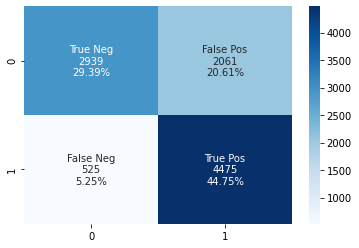

In [ ]:
plot_matrix(conf_mat)

# TESTING

In [ ]:

def predict(question1, question2, threshold, model, vocab, data_generator=batch_generator, verbose=False):
    
    q1 = [porter.stem(w) for w in (text_to_word_list(question1))]  
    q2 = [porter.stem(w) for w in (text_to_word_list(question2))]
    Q1, Q2 = [], []
    for word in q1:  
        Q1.append(vocab[word])
    for word in q2:  
        Q2.append(vocab[word])
        
  
    Q1, Q2 = next(data_generator([Q1], [Q2], 1, pad = vocab['<PAD>']))
   
    v1, v2 = model((Q1, Q2))

    d = np.dot(v1[0], v2[0].T)
    
    res = d > threshold
    

    
    if(verbose):
        print("Q1  = ", Q1, "\nQ2  = ", Q2)
        print("d   = ", d)
        print("res = ", res)

    return res

In [ ]:
question1 = "When will I see you again?"
question2 = "When can I see you again?"

predict(question1 , question2, 0.7, model, vocab, verbose = True)

Q1  =  [[ 323   64    4   37   43 2684    1    1]] 
Q2  =  [[ 323   24    4   37   43 2684    1    1]]
d   =  0.91430193
res =  True


True